# Aula 26/09/25

In [ ]:
!pip install catboost

In [ ]:
import sys                             # Lê parametros do sistema
import os                              # Interage com o sistema operacional
import numpy as np                     # Trabalha com arrays e matrizes multidimensionais
import pandas as pd                    # Manipula e analisa dados
import matplotlib as mpl               # Cria gráficos 2D
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score,make_scorer

In [ ]:
import sklearn                         # Performa data mining e analise
from sklearn.utils import shuffle      # Embaralha os dados
from time import time                  # Calcula o tempo do treino

In [ ]:
from google.colab import drive

criando acesso ao G drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Abrir o arquivo
base = pd.read_csv('/content/drive/MyDrive/dados/Iris.csv',  sep=',',header=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
229,230,6.0,2.7,5.1,1.6,Iris-versicolor
230,231,5.4,3.0,4.5,1.5,Iris-versicolor
231,232,6.0,3.4,4.5,1.6,Iris-versicolor
232,233,6.7,3.1,4.7,1.5,Iris-versicolor


In [ ]:
base.shape[1]

6

In [ ]:
# consulta de valores nan na base
base[base.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
151,152,4.8,NaN,1.4,0.2,Iris-setosa
162,163,4.9,3.0,NaN,0.1,Iris-setosa
176,177,NaN,3.4,1.6,0.4,Iris-setosa
195,196,4.8,NaN,1.4,0.3,Iris-setosa
215,216,NaN,2.5,3.9,1.1,Iris-versicolor
222,223,6.8,NaN,4.8,1.4,Iris-versicolor
223,224,6.7,3.0,NaN,1.7,Iris-versicolor
228,229,5.8,2.7,NaN,1.2,Iris-versicolor


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

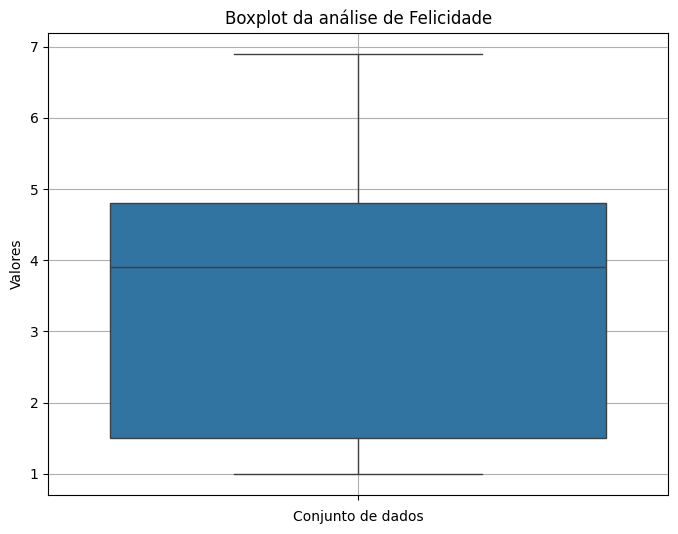

Limite superior do boxplot: 6.9
3o quartil do boxplot: 4.8
Mediana do primeiro conjunto de dados: 1.0
1o quartil do boxplot: 1.5
Limite inferior do boxplot: 1.0


In [ ]:
#Preparando os valores
dados = base['PetalLengthCm']

# Definindo as dimensões e plotando o boxplot
plt.figure(figsize=(8, 6))
boxplot_dict = sns.boxplot(dados)

plt.title('Boxplot da análise de Felicidade')
plt.xlabel('Conjunto de dados')
plt.ylabel('Valores')
plt.grid(True)


# Obtem eixos do gráfico ANTES DE MOSTRAR O GRÁFICO
ax = plt.gca()

# Acessa as linhas que representam whiskers (limites) and quartis
lines = ax.get_lines()
# As linhas são:
# 0: limite inferior, 1: limite inferior, 2: mediana


plt.show() # Mostrando o gráfico APÓS obter as linhas

prim_quartil = lines[0].get_ydata()[0]
terc_quartil = lines[1].get_ydata()[0]
lim_inf_premio = lines[0].get_ydata()[1]
lim_sup_premio = lines[1].get_ydata()[1]
mediana_premio = lines[2].get_ydata()[1]

print("Limite superior do boxplot:", lim_sup_premio)
print("3o quartil do boxplot:", terc_quartil)
print("Mediana do primeiro conjunto de dados:", mediana_premio)
print("1o quartil do boxplot:", prim_quartil)
print("Limite inferior do boxplot:", lim_inf_premio)

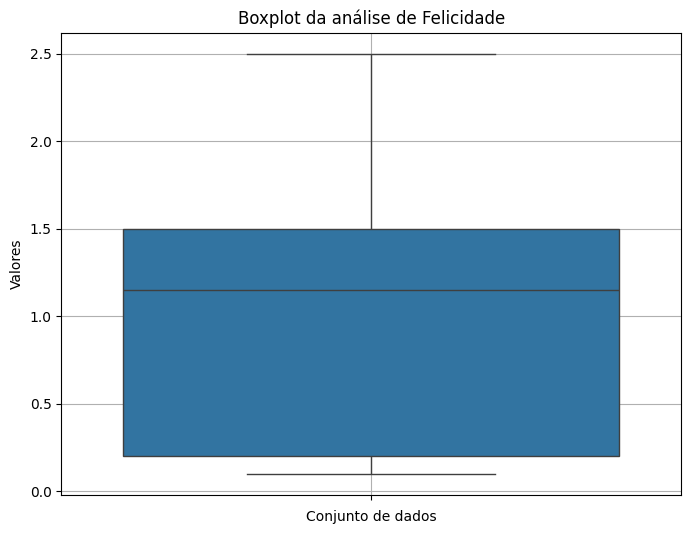

Limite superior do boxplot: 2.5
3o quartil do boxplot: 1.5
Mediana do primeiro conjunto de dados: 0.1
1o quartil do boxplot: 0.2
Limite inferior do boxplot: 0.1


In [ ]:
#Preparando os valores
dados = base['PetalWidthCm']

# Definindo as dimensões e plotando o boxplot
plt.figure(figsize=(8, 6))
boxplot_dict = sns.boxplot(dados)

plt.title('Boxplot da análise de Felicidade')
plt.xlabel('Conjunto de dados')
plt.ylabel('Valores')
plt.grid(True)


# Obtem eixos do gráfico ANTES DE MOSTRAR O GRÁFICO
ax = plt.gca()

# Acessa as linhas que representam whiskers (limites) and quartis
lines = ax.get_lines()
# As linhas são:
# 0: limite inferior, 1: limite inferior, 2: mediana


plt.show() # Mostrando o gráfico APÓS obter as linhas

prim_quartil = lines[0].get_ydata()[0]
terc_quartil = lines[1].get_ydata()[0]
lim_inf_premio = lines[0].get_ydata()[1]
lim_sup_premio = lines[1].get_ydata()[1]
mediana_premio = lines[2].get_ydata()[1]

print("Limite superior do boxplot:", lim_sup_premio)
print("3o quartil do boxplot:", terc_quartil)
print("Mediana do primeiro conjunto de dados:", mediana_premio)
print("1o quartil do boxplot:", prim_quartil)
print("Limite inferior do boxplot:", lim_inf_premio)

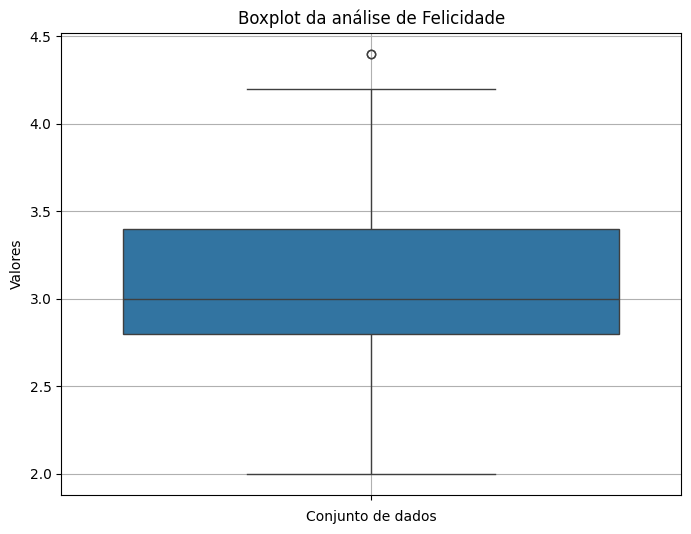

Limite superior do boxplot: 4.2
3o quartil do boxplot: 3.4
Mediana do primeiro conjunto de dados: 2.0
1o quartil do boxplot: 2.8
Limite inferior do boxplot: 2.0


In [ ]:
#Preparando os valores
dados = base['SepalWidthCm']

# Definindo as dimensões e plotando o boxplot
plt.figure(figsize=(8, 6))
boxplot_dict = sns.boxplot(dados)

plt.title('Boxplot da análise de Felicidade')
plt.xlabel('Conjunto de dados')
plt.ylabel('Valores')
plt.grid(True)


# Obtem eixos do gráfico ANTES DE MOSTRAR O GRÁFICO
ax = plt.gca()

# Acessa as linhas que representam whiskers (limites) and quartis
lines = ax.get_lines()
# As linhas são:
# 0: limite inferior, 1: limite inferior, 2: mediana


plt.show() # Mostrando o gráfico APÓS obter as linhas

prim_quartil = lines[0].get_ydata()[0]
terc_quartil = lines[1].get_ydata()[0]
lim_inf_premio = lines[0].get_ydata()[1]
lim_sup_premio = lines[1].get_ydata()[1]
mediana_premio = lines[2].get_ydata()[1]

print("Limite superior do boxplot:", lim_sup_premio)
print("3o quartil do boxplot:", terc_quartil)
print("Mediana do primeiro conjunto de dados:", mediana_premio)
print("1o quartil do boxplot:", prim_quartil)
print("Limite inferior do boxplot:", lim_inf_premio)

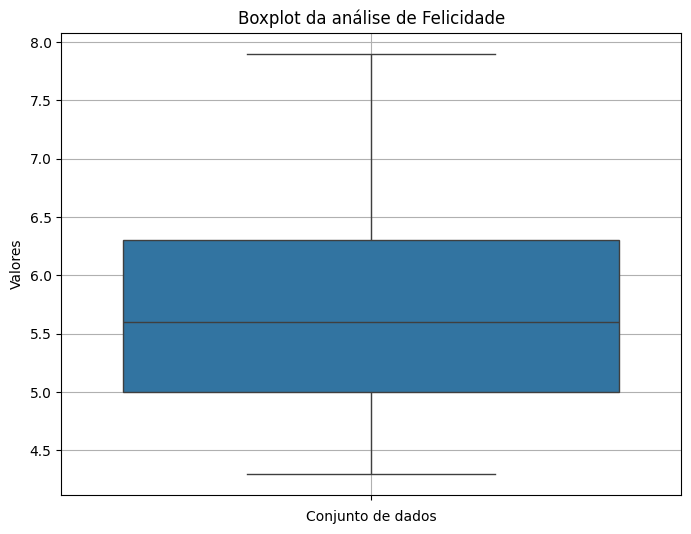

Limite superior do boxplot: 7.9
3o quartil do boxplot: 6.3
Mediana do primeiro conjunto de dados: 4.3
1o quartil do boxplot: 5.0
Limite inferior do boxplot: 4.3


In [ ]:
#Preparando os valores
dados = base['SepalLengthCm']

# Definindo as dimensões e plotando o boxplot
plt.figure(figsize=(8, 6))
boxplot_dict = sns.boxplot(dados)

plt.title('Boxplot da análise de Felicidade')
plt.xlabel('Conjunto de dados')
plt.ylabel('Valores')
plt.grid(True)


# Obtem eixos do gráfico ANTES DE MOSTRAR O GRÁFICO
ax = plt.gca()

# Acessa as linhas que representam whiskers (limites) and quartis
lines = ax.get_lines()
# As linhas são:
# 0: limite inferior, 1: limite inferior, 2: mediana


plt.show() # Mostrando o gráfico APÓS obter as linhas

prim_quartil = lines[0].get_ydata()[0]
terc_quartil = lines[1].get_ydata()[0]
lim_inf_premio = lines[0].get_ydata()[1]
lim_sup_premio = lines[1].get_ydata()[1]
mediana_premio = lines[2].get_ydata()[1]

print("Limite superior do boxplot:", lim_sup_premio)
print("3o quartil do boxplot:", terc_quartil)
print("Mediana do primeiro conjunto de dados:", mediana_premio)
print("1o quartil do boxplot:", prim_quartil)
print("Limite inferior do boxplot:", lim_inf_premio)

In [ ]:
base=base.dropna()

In [ ]:
base.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,114.668142,5.697345,3.096460,3.365487,1.026549
std,66.944093,0.787453,0.456543,1.748156,0.742550
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,57.250000,5.100000,2.800000,1.500000,0.200000
50%,113.500000,5.600000,3.100000,3.900000,1.200000
75%,171.750000,6.300000,3.400000,4.800000,1.500000
max,234.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#separar os dados de entrada e saida
X_entrada = base.iloc[:,1:5].values
y_saida = base.iloc[:, 5].values

In [ ]:
X_entrada

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y_saida

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<Axes: xlabel='Species', ylabel='Count'>

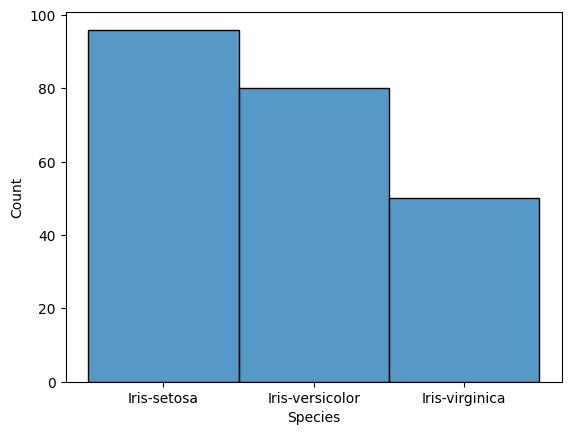

In [ ]:
# necessário para o histograma
import seaborn as sns
import matplotlib.pyplot as plt
# Distribuição das variáveis
sns.histplot(base["Species"])

In [ ]:
base=base.dropna()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separando features e target
X = base.drop(columns=['Species'])  # Todas as colunas exceto Species
y = base['Species']  # A coluna que queremos balancear

# Aplicando SMOTE para aumentar a quantidade de linhas das classes
# Iris-versicolor e Iris-virginica com a finalidade de balancear
# a quantidade de cada classe
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criando um novo DataFrame balanceado
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Species'] = y_resampled  # Adicionando a coluna Species de volta

# Verificando a distribuição após o balanceamento
print(df_balanced['Species'].value_counts())

Species
Iris-setosa        96
Iris-versicolor    96
Iris-virginica     96
Name: count, dtype: int64


<Axes: xlabel='Species', ylabel='Count'>

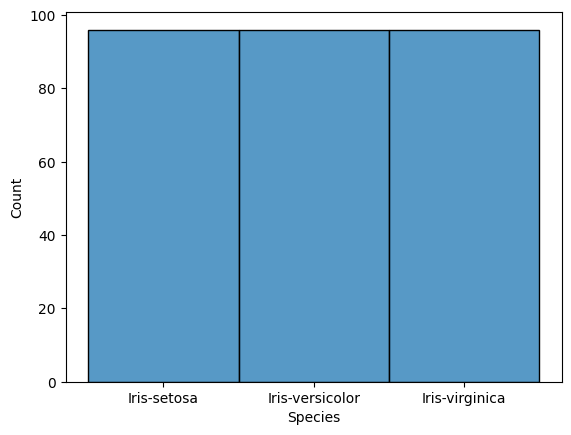

In [ ]:
# Distribuição das variáveis
sns.histplot(df_balanced["Species"])

In [ ]:
#padronizar df_balanced colunas 1 a 4
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_balanced.iloc[:, 1:5] = scaler.fit_transform(df_balanced.iloc[:, 1:5])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separando features e target
X_under = base.drop(columns=['Species'])  # Todas as colunas exceto Species
y_under = base['Species']  # A coluna que queremos balancear


# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, stratify=y, shuffle=True, test_size = 0.15)
# importar as bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler
# criando uma instância do RandomUnderSampling para reduzir a quantidade de linhas
# das classes Iris-versicolor e Iris-virginica para balancear a quantidade de dados
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
# balanceando os dados
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
y_res.value_counts()

,count
Species,
Iris-versicolor,68
Iris-setosa,42
Iris-virginica,42


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_balanced.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#separar os dados de entrada e saída
X_entrada = df_balanced.iloc[:,1:5].values
y_saida = df_balanced.iloc[:,5].values

In [ ]:
# Separar os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_entrada, y_saida, test_size=0.3, random_state=42,
                                                    shuffle=True, stratify=y_saida)

In [ ]:
from sklearn.neural_network import MLPClassifier

Épocas (epochs) referem-se ao número de vezes que todo o conjunto de dados de treinamento é passado pela rede neural durante o processo de treinamento. Na mensagem "Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet." significa que em 200 épocas (padrão) o algoritmo de otimização dos pesos não conseguiu convergir para o resultado, então o programador precisa definir um valor maior para as épocas. O algoritmo padrão para otimização é o adam, algoritmo com melhor resultado para dados complexos.

Função Ativação
‘identity’, ativação no-op, útil para implementar gargalo linear, retorna f(x) = x. (camada de saída)

‘logistic’, a função sigmóide logística retorna f(x) = 1 / (1 + exp(-x)). (classificação binária)

‘tanh’, a função tan hiperbólica, retorna f(x) = tanh(x). (saídas centradas em zero)

‘relu’, a função de unidade linear retificada, retorna f(x) = max(0, x). (saídas a partir de zero)

In [ ]:
mlp = MLPClassifier(max_iter=1000, verbose = True, hidden_layer_sizes=(8), activation='logistic', solver='adam', random_state=42)

In [ ]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.12372261
Iteration 2, loss = 1.12126704
Iteration 3, loss = 1.11977863
Iteration 4, loss = 1.11743976
Iteration 5, loss = 1.11470461
Iteration 6, loss = 1.11174489
Iteration 7, loss = 1.10870865
Iteration 8, loss = 1.10566043
Iteration 9, loss = 1.10257303
Iteration 10, loss = 1.09953873
Iteration 11, loss = 1.09686913
Iteration 12, loss = 1.09448148
Iteration 13, loss = 1.09225720
Iteration 14, loss = 1.09025359
Iteration 15, loss = 1.08815798
Iteration 16, loss = 1.08601464
Iteration 17, loss = 1.08373676
Iteration 18, loss = 1.08138760
Iteration 19, loss = 1.07908591
Iteration 20, loss = 1.07683515
Iteration 21, loss = 1.07451479
Iteration 22, loss = 1.07217984
Iteration 23, loss = 1.06983100
Iteration 24, loss = 1.06762715
Iteration 25, loss = 1.06561506
Iteration 26, loss = 1.06371438
Iteration 27, loss = 1.06200934
Iteration 28, loss = 1.06025766
Iteration 29, loss = 1.05851744
Iteration 30, loss = 1.05693444
Iteration 31, loss = 1.05537152
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=8, max_iter=1000,
              random_state=42, verbose=True)

In [ ]:
#definir a quantidade de dobras
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#realizar a validação cruzada
scores = cross_val_score(mlp, X_entrada, y_saida, cv=kfold)
print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
print("Desvio padrão: {:.2f}%".format(scores.std() * 100))
print("Acurácia: ",scores)

Iteration 1, loss = 1.12244197
Iteration 2, loss = 1.11785560
Iteration 3, loss = 1.11338330
Iteration 4, loss = 1.10933204
Iteration 5, loss = 1.10522676
Iteration 6, loss = 1.10137555
Iteration 7, loss = 1.09752721
Iteration 8, loss = 1.09386953
Iteration 9, loss = 1.09043478
Iteration 10, loss = 1.08688999
Iteration 11, loss = 1.08378650
Iteration 12, loss = 1.08052565
Iteration 13, loss = 1.07742994
Iteration 14, loss = 1.07422569
Iteration 15, loss = 1.07108929
Iteration 16, loss = 1.06780164
Iteration 17, loss = 1.06456144
Iteration 18, loss = 1.06143100
Iteration 19, loss = 1.05834715
Iteration 20, loss = 1.05512540
Iteration 21, loss = 1.05216333
Iteration 22, loss = 1.04906557
Iteration 23, loss = 1.04608947
Iteration 24, loss = 1.04307680
Iteration 25, loss = 1.04027903
Iteration 26, loss = 1.03745516
Iteration 27, loss = 1.03468571
Iteration 28, loss = 1.03205094
Iteration 29, loss = 1.02939285
Iteration 30, loss = 1.02693711
Iteration 31, loss = 1.02440814
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 117, loss = 0.78581733
Iteration 118, loss = 0.78299872
Iteration 119, loss = 0.78011208
Iteration 120, loss = 0.77728618
Iteration 121, loss = 0.77444682
Iteration 122, loss = 0.77161071
Iteration 123, loss = 0.76878548
Iteration 124, loss = 0.76596332
Iteration 125, loss = 0.76317751
Iteration 126, loss = 0.76037087
Iteration 127, loss = 0.75756818
Iteration 128, loss = 0.75477396
Iteration 129, loss = 0.75201681
Iteration 130, loss = 0.74921439
Iteration 131, loss = 0.74647216
Iteration 132, loss = 0.74377032
Iteration 133, loss = 0.74098229
Iteration 134, loss = 0.73828354
Iteration 135, loss = 0.73554119
Iteration 136, loss = 0.73286120
Iteration 137, loss = 0.73018523
Iteration 138, loss = 0.72747979
Iteration 139, loss = 0.72487702
Iteration 140, loss = 0.72224638
Iteration 141, loss = 0.71967354
Iteration 142, loss = 0.71701781
Iteration 143, loss = 0.71450723
Iteration 144, loss = 0.71191902
Iteration 145, loss = 0.70938086
Iteration 146, loss = 0.70691242
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 144, loss = 0.71556954
Iteration 145, loss = 0.71304134
Iteration 146, loss = 0.71056023
Iteration 147, loss = 0.70806600
Iteration 148, loss = 0.70558496
Iteration 149, loss = 0.70316024
Iteration 150, loss = 0.70069201
Iteration 151, loss = 0.69824714
Iteration 152, loss = 0.69585087
Iteration 153, loss = 0.69342577
Iteration 154, loss = 0.69108397
Iteration 155, loss = 0.68868654
Iteration 156, loss = 0.68635458
Iteration 157, loss = 0.68401989
Iteration 158, loss = 0.68170109
Iteration 159, loss = 0.67938976
Iteration 160, loss = 0.67712243
Iteration 161, loss = 0.67482840
Iteration 162, loss = 0.67257403
Iteration 163, loss = 0.67031384
Iteration 164, loss = 0.66809776
Iteration 165, loss = 0.66588067
Iteration 166, loss = 0.66368537
Iteration 167, loss = 0.66151199
Iteration 168, loss = 0.65936469
Iteration 169, loss = 0.65723717
Iteration 170, loss = 0.65514592
Iteration 171, loss = 0.65304960
Iteration 172, loss = 0.65097251
Iteration 173, loss = 0.64891834
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.11792385
Iteration 3, loss = 1.11373850
Iteration 4, loss = 1.10965335
Iteration 5, loss = 1.10566290
Iteration 6, loss = 1.10199893
Iteration 7, loss = 1.09806998
Iteration 8, loss = 1.09443475
Iteration 9, loss = 1.09082580
Iteration 10, loss = 1.08736427
Iteration 11, loss = 1.08400188
Iteration 12, loss = 1.08067401
Iteration 13, loss = 1.07773085
Iteration 14, loss = 1.07457423
Iteration 15, loss = 1.07180309
Iteration 16, loss = 1.06868229
Iteration 17, loss = 1.06565249
Iteration 18, loss = 1.06289906
Iteration 19, loss = 1.05988404
Iteration 20, loss = 1.05709530
Iteration 21, loss = 1.05438495
Iteration 22, loss = 1.05154504
Iteration 23, loss = 1.04875243
Iteration 24, loss = 1.04622583
Iteration 25, loss = 1.04349972
Iteration 26, loss = 1.04082953
Iteration 27, loss = 1.03825977
Iteration 28, loss = 1.03564678
Iteration 29, loss = 1.03315597
Iteration 30, loss = 1.03056793
Iteration 31, loss = 1.02805919
Iteration 32, loss = 1.02566388
Iteration 33, lo

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 1.04005367
Iteration 27, loss = 1.03754459
Iteration 28, loss = 1.03500878
Iteration 29, loss = 1.03253057
Iteration 30, loss = 1.03001275
Iteration 31, loss = 1.02752901
Iteration 32, loss = 1.02511161
Iteration 33, loss = 1.02256645
Iteration 34, loss = 1.02012861
Iteration 35, loss = 1.01767915
Iteration 36, loss = 1.01514481
Iteration 37, loss = 1.01276100
Iteration 38, loss = 1.01039333
Iteration 39, loss = 1.00796466
Iteration 40, loss = 1.00572498
Iteration 41, loss = 1.00335052
Iteration 42, loss = 1.00110148
Iteration 43, loss = 0.99884473
Iteration 44, loss = 0.99656623
Iteration 45, loss = 0.99427221
Iteration 46, loss = 0.99198203
Iteration 47, loss = 0.98964635
Iteration 48, loss = 0.98721299
Iteration 49, loss = 0.98486135
Iteration 50, loss = 0.98241632
Iteration 51, loss = 0.98006828
Iteration 52, loss = 0.97755372
Iteration 53, loss = 0.97514613
Iteration 54, loss = 0.97269790
Iteration 55, loss = 0.97031205
Iteration 56, loss = 0.96788470
Iteratio

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = mlp.predict(X_train)

In [ ]:
y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
 

In [ ]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
   

In [ ]:
score = accuracy_score(y_train, y_pred)
print("Acurácia do modelo:", (score*100))

Acurácia do modelo: 89.55223880597015


In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", score)

Acurácia do modelo: 0.8505747126436781


In [ ]:
#salvar o scaler da padronização usando joblib
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/dados/scaler.pkl')

#salvar o modelo de rede neural mlp
joblib.dump(mlp, '/content/drive/MyDrive/dados/mlpIris.pkl')

['/content/drive/MyDrive/dados/mlpIris.pkl']

In [ ]:
#abrir a padronização scaler
scaler = joblib.load('/content/drive/MyDrive/dados/scaler.pkl')

#aplicar a padronização scaler a [6.3, 2.3, 4.4, 1.3]
nova_amostra = scaler.transform([[6.3, 2.3, 4.4, 1.3]])

#abrir o modelo de rede neural
mlp = joblib.load('/content/drive/MyDrive/dados/mlpIris.pkl')

#fazer a predição
predicao = mlp.predict(nova_amostra)

#imprimir a predição
print(predicao)

['Iris-versicolor']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
base.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
'''
Uma floresta aleatória é um metaestimador que ajusta uma série de classificadores de árvores de decisão
em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar
o sobreajuste. (Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
'''
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Avaliação
print("=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, rf_preds))

=== Random Forest ===
Acurácia: 0.9885057471264368


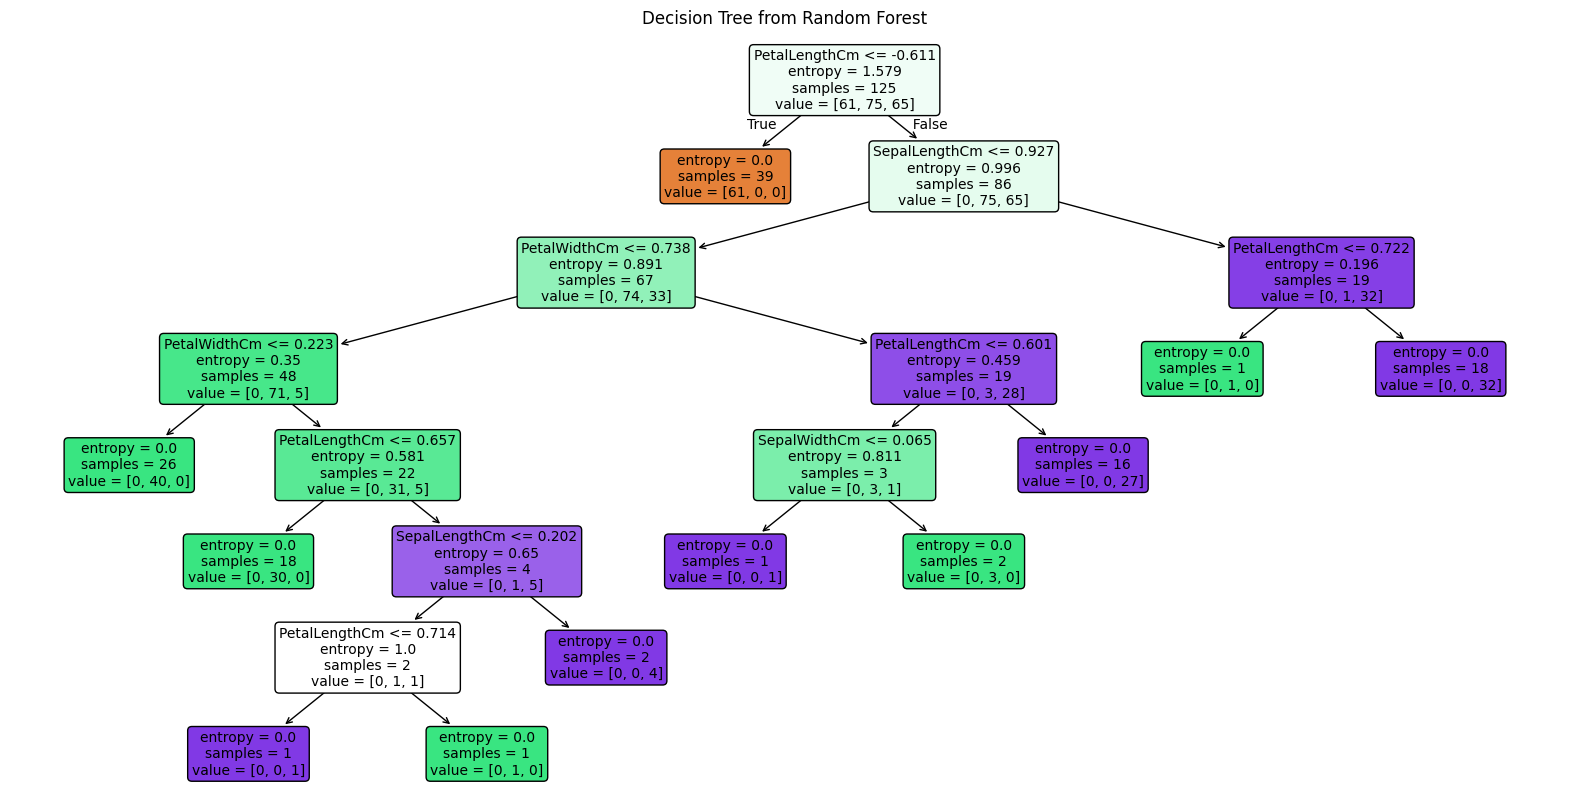

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

arvore = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
colunas = base.columns[1:5].tolist()
plot_tree(arvore, feature_names=colunas, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [ ]:
rf_scores = cross_val_score(rf_model, X_entrada, y_saida, cv=kfold)
print("Acurácia média: {:.2f}%".format(rf_scores.mean() * 100))
print("Desvio padrão: {:.2f}%".format(rf_scores.std() * 100))
print("Acurácia: ",rf_scores)

Acurácia média: 97.22%
Desvio padrão: 1.38%
Acurácia:  [0.94827586 0.98275862 0.98275862 0.96491228 0.98245614]


In [ ]:
precisao = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
rf_validate = cross_validate(rf_model, X_entrada, y_saida,
  cv=kfold,scoring={'accuracy':'accuracy','precision':precisao,'recall':recall},
  return_train_score=True)
df_validate = pd.DataFrame(rf_validate)
df_validate

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.743853,0.042937,0.948276,1.0,0.954545,1.0,0.947368,1.0
1,0.763013,0.043010,0.982759,1.0,0.984127,1.0,0.982456,1.0
2,0.457963,0.020502,0.982759,1.0,0.984127,1.0,0.982456,1.0
3,0.266087,0.021034,0.964912,1.0,0.968254,1.0,0.964912,1.0
4,0.281739,0.020170,0.982456,1.0,0.983333,1.0,0.982456,1.0


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Modelo CatBoost
cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train)
cb_preds = cb_model.predict(X_test)

print("\n=== CatBoost ===")
print("Acurácia:", accuracy_score(y_test, cb_preds))

Learning rate set to 0.07291
0:	learn: 0.9997610	total: 54.8ms	remaining: 54.7s
1:	learn: 0.9231754	total: 57.3ms	remaining: 28.6s
2:	learn: 0.8475693	total: 60.8ms	remaining: 20.2s
3:	learn: 0.7895013	total: 65.1ms	remaining: 16.2s
4:	learn: 0.7286594	total: 71.8ms	remaining: 14.3s
5:	learn: 0.6794947	total: 79.2ms	remaining: 13.1s
6:	learn: 0.6381206	total: 82.8ms	remaining: 11.7s
7:	learn: 0.5946459	total: 84.2ms	remaining: 10.4s
8:	learn: 0.5586956	total: 90.6ms	remaining: 9.98s
9:	learn: 0.5226811	total: 98.7ms	remaining: 9.77s
10:	learn: 0.4914303	total: 100ms	remaining: 8.99s
11:	learn: 0.4610271	total: 105ms	remaining: 8.68s
12:	learn: 0.4370800	total: 113ms	remaining: 8.61s
13:	learn: 0.4142991	total: 115ms	remaining: 8.08s
14:	learn: 0.3928288	total: 122ms	remaining: 7.99s
15:	learn: 0.3722328	total: 123ms	remaining: 7.57s
16:	learn: 0.3541375	total: 130ms	remaining: 7.49s
17:	learn: 0.3370590	total: 136ms	remaining: 7.43s
18:	learn: 0.3209914	total: 142ms	remaining: 7.35s
19